# Reading data

In [344]:
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree #Decision tree--eager learner

from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.pipeline import make_pipeline
from matplotlib.pyplot import figure
# importing the required module
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data preparation

In [345]:
#reading data
data = pd.read_csv("data/crx.data", header=None)
#adding headers
data_new=pd.read_csv("data/crx.data", names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'])
#Creating and .cv file 
data_new.to_csv("ymugiran_project.csv",index=False)



# Exploratory Data Analysis (EDA)

Understanding the dataset 

In [346]:
#sampling 30 rows
data_new.sample(30)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
233,b,27.67,13.750,u,g,w,v,5.750,t,f,0,t,g,00487,500,+
223,a,18.83,9.540,u,g,aa,v,0.085,t,f,0,f,g,00100,0,+
263,a,20.42,10.500,y,p,x,h,0.000,f,f,0,t,g,00154,32,-
433,b,25.25,1.000,u,g,aa,v,0.500,f,f,0,f,g,00200,0,-
286,a,?,1.500,u,g,ff,ff,0.000,f,t,2,t,g,00200,105,-
430,b,51.83,3.000,y,p,ff,ff,1.500,f,f,0,f,g,00180,4,-
598,?,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,00240,768,+
90,b,62.50,12.750,y,p,c,h,5.000,t,f,0,f,g,00112,0,-
209,b,39.50,4.250,u,g,c,bb,6.500,t,t,16,f,g,00117,1210,+
130,b,67.75,5.500,u,g,e,z,13.000,t,t,1,t,g,00000,0,+


In [347]:
#Retreiving the first 30 rows
data_new.head(30)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [348]:
# dataset information
data_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [349]:
#dataset describe
data_new.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


Detecting  and handling missing values

In [350]:
#Counting Every columns missing values
columns=data_new.columns
for i in columns:
    l=len(data_new[data_new[i]=="?"])
    print ( f" {i} : {l} " )




 A1 : 12 
 A2 : 12 
 A3 : 0 
 A4 : 6 
 A5 : 6 
 A6 : 9 
 A7 : 9 
 A8 : 0 
 A9 : 0 
 A10 : 0 
 A11 : 0 
 A12 : 0 
 A13 : 0 
 A14 : 13 
 A15 : 0 
 A16 : 0 


In [351]:
#Replacing missing values with nan 
columns=data_new.columns
for column in columns:
    data_new[column] = data_new[column].replace("?", np.nan)


   
    


Identifying outliers

In [352]:
# # separating continous variables and  categorical variables
# categorical_variables=data_new.drop(['A2','A3', 'A8', 'A11', 'A14','A15'], axis = 1)
# continous_variables=data_new[['A2','A3', 'A8', 'A11', 'A14','A15']]


Changing variables data types for ploting box plot

In [353]:
# changing original datatypes for A14 and A2

#continous_variables=continous_variables.dropna()
data_new = data_new.dropna()
convert_dict = {'A14': int,
                'A2': float
               }
  
data_new = data_new.astype(convert_dict)

In [354]:
# separating continous variables and  categorical variables
categorical_variables=data_new.drop(['A2','A3', 'A8', 'A11', 'A14','A15'], axis = 1)
continous_variables=data_new[['A2','A3', 'A8', 'A11', 'A14','A15']]

<Figure size 6400x3200 with 0 Axes>

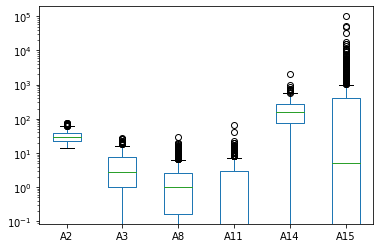

In [355]:
#Checking for outliers using boxplot

figure(figsize = (80, 40), dpi = 80)
continous_variables.plot(kind='box')
plt.semilogy();

# Data preprocessing 

Handling missing data

In [356]:
#Droping all rows that have missing values
data_new=data_new.dropna()

Variable encoding

In [357]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

#selecting categorical columns to be encoded
encoding_columns=data_new.drop(['A2','A3', 'A8', 'A11', 'A14','A15'], axis = 1).columns

#Encoding every categorical columns
for column in encoding_columns:
    data_new[column] = labelencoder.fit_transform(data_new[column])



#updating categorical values with encoded values
categorical_variables=data_new.drop(['A2','A3', 'A8', 'A11', 'A14','A15'], axis = 1)

Handling outliers using Z-score

In [358]:
#z-score for continous variable
z_scores = stats.zscore(continous_variables)
z_scores



array([[-0.05696186, -0.96144036, -0.29517124, -0.30259629,  0.12868165,
        -0.19312477],
       [ 2.29653644, -0.07356485,  0.23621655,  0.70451573, -0.81680202,
        -0.08644296],
       [-0.59207839, -0.86190275, -0.22095507, -0.50401869,  0.59250383,
        -0.0361501 ],
       ...,
       [-0.52867596,  1.72607519, -0.07252273, -0.30259629,  0.11678877,
        -0.19293427],
       [-1.14832907, -0.92062994, -0.65437752, -0.50401869,  0.59250383,
        -0.05024734],
       [ 0.29555567, -0.28956147,  1.79475619, -0.50401869, -1.07249886,
        -0.19312477]])

In [359]:
#Absolute value of z-score
abs_z_scores = np.abs(z_scores)
abs_z_scores


array([[0.05696186, 0.96144036, 0.29517124, 0.30259629, 0.12868165,
        0.19312477],
       [2.29653644, 0.07356485, 0.23621655, 0.70451573, 0.81680202,
        0.08644296],
       [0.59207839, 0.86190275, 0.22095507, 0.50401869, 0.59250383,
        0.0361501 ],
       ...,
       [0.52867596, 1.72607519, 0.07252273, 0.30259629, 0.11678877,
        0.19293427],
       [1.14832907, 0.92062994, 0.65437752, 0.50401869, 0.59250383,
        0.05024734],
       [0.29555567, 0.28956147, 1.79475619, 0.50401869, 1.07249886,
        0.19312477]])

In [360]:
# Filterling outliers using a threshold of 3
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = continous_variables[filtered_entries]

#creating a new dataframe that does not have outliers
data_new=pd.merge(categorical_variables, new_df, left_index=True, right_index=True)
data_new



,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16,A2,A3,A8,A11,A14,A15
0,1,1,0,12,7,1,1,0,0,0,30.83,0.000,1.25,1,202,0
1,0,1,0,10,3,1,1,0,0,0,58.67,4.460,3.04,6,43,560
2,0,1,0,10,3,1,0,0,0,0,24.50,0.500,1.50,0,280,824
3,1,1,0,12,7,1,1,1,0,0,27.83,1.540,3.75,5,100,3
4,1,1,0,12,7,1,0,0,2,0,20.17,5.625,1.71,0,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,2,2,4,3,0,0,0,0,1,21.08,10.085,1.25,0,260,0
686,0,1,0,1,7,0,1,1,0,1,22.67,0.750,2.00,2,200,394
687,0,2,2,5,2,0,1,1,0,1,25.25,13.500,2.00,1,200,1
688,1,1,0,0,7,0,0,0,0,1,17.92,0.205,0.04,0,280,750


<Figure size 6400x3200 with 0 Axes>

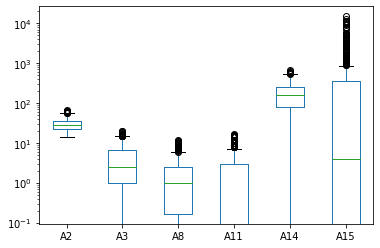

In [361]:
#checking if the outliers have removed
figure(figsize = (80, 40), dpi = 80)
data_new[['A2','A3', 'A8', 'A11', 'A14','A15']].plot(kind='box')
plt.semilogy();

# Neural Network 

In [362]:
#importing necessary packages
from sklearn.neural_network import MLPClassifier,MLPRegressor

In [363]:
#getting dependent and independent
y=data_new['A16']
X=data_new.drop(['A16'], axis = 1)

In [364]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [365]:
#scalling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
data_new

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16,A2,A3,A8,A11,A14,A15
0,1,1,0,12,7,1,1,0,0,0,30.83,0.000,1.25,1,202,0
1,0,1,0,10,3,1,1,0,0,0,58.67,4.460,3.04,6,43,560
2,0,1,0,10,3,1,0,0,0,0,24.50,0.500,1.50,0,280,824
3,1,1,0,12,7,1,1,1,0,0,27.83,1.540,3.75,5,100,3
4,1,1,0,12,7,1,0,0,2,0,20.17,5.625,1.71,0,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,2,2,4,3,0,0,0,0,1,21.08,10.085,1.25,0,260,0
686,0,1,0,1,7,0,1,1,0,1,22.67,0.750,2.00,2,200,394
687,0,2,2,5,2,0,1,1,0,1,25.25,13.500,2.00,1,200,1
688,1,1,0,0,7,0,0,0,0,1,17.92,0.205,0.04,0,280,750


Random model

In [366]:
#random model object
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)



In [367]:
#mesauring performance
from sklearn.model_selection import cross_val_score,cross_validate
scores = cross_validate(mlp, X=X, y=y, cv=10, scoring =["accuracy", "recall"])



In [371]:
accuracy=scores['test_accuracy'].mean()
recall=scores['test_recall'].mean()
print(f"Recall : {recall}  , Accuracy : {accuracy}")


Recall : 0.7825210084033614  , Accuracy : 0.7287158469945354


Hyperparameter tuning

In [372]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [373]:
#Define the search space
search_space={
  'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate':['constant', 'invscaling', 'adaptive'],
             }

In [374]:
#Create a GridSearch object
mlp = MLPClassifier()

gd_search=GridSearchCV(estimator=mlp, param_grid=search_space,\
                        cv=10, n_jobs=1,verbose=2,scoring='accuracy')

In [375]:
gd_search=gd_search.fit(X_train,y_train)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant 
[CV]  activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant 
[CV]  activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, total=   0.4s
[CV] activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant 
[CV]  activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant 
[CV]  activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, total=   0.3s
[CV] activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate=constant 
[CV]  activation=identity, hidden_layer_sizes=(150, 100, 50), learning_rate

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  9.0min finished


In [376]:
gd_search.best_params_

{'activation': 'identity',
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate': 'adaptive'}

In [377]:
mlp2 = MLPClassifier(hidden_layer_sizes= (100, 50, 30), learning_rate='adaptive', activation= 'logistic')
scores2 = cross_validate(mlp2, X=X_train, y=y_train, cv=10, scoring =["accuracy", "recall"])

In [378]:
scores2

{'fit_time': array([1.2032795 , 1.15633345, 1.22176933, 0.63729501, 1.13157392,
        0.96745014, 0.95119691, 1.05720115, 1.11123657, 0.89411855]),
 'score_time': array([0.00199723, 0.00299191, 0.00199413, 0.00199437, 0.00299215,
        0.00196314, 0.00199509, 0.00299215, 0.00199413, 0.00199509]),
 'test_accuracy': array([0.71428571, 0.89795918, 0.89795918, 0.83673469, 0.89795918,
        0.91836735, 0.72916667, 0.83333333, 0.77083333, 0.875     ]),
 'test_recall': array([0.67857143, 0.89285714, 0.85714286, 0.89285714, 0.96428571,
        0.88888889, 0.7037037 , 0.77777778, 0.77777778, 0.88888889])}

Model comparison with bar graph

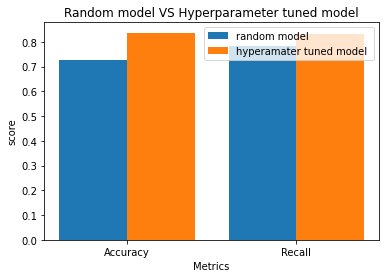

In [379]:
X = ['Accuracy','Recall']
model1 = [scores['test_accuracy'].mean(),scores['test_recall'].mean()]
model2 = [scores2['test_accuracy'].mean(),scores2['test_recall'].mean()]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, model1, 0.4, label = 'random model')
plt.bar(X_axis + 0.2, model2, 0.4, label = 'hyperamater tuned model ')
  
plt.xticks(X_axis, X)
plt.xlabel("Metrics")
plt.ylabel("score")
plt.title("Random model VS Hyperparameter tuned model")
plt.legend()
plt.show()


